<a href="https://colab.research.google.com/github/Nik-Kras/Wave-Function-Collapse-Grid-World-Maze/blob/main/Wave_Function_Collapse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import numpy as np
import matplotlib.pyplot as plt

Creating Tiles 

*Photo misunderstand walls and paths*

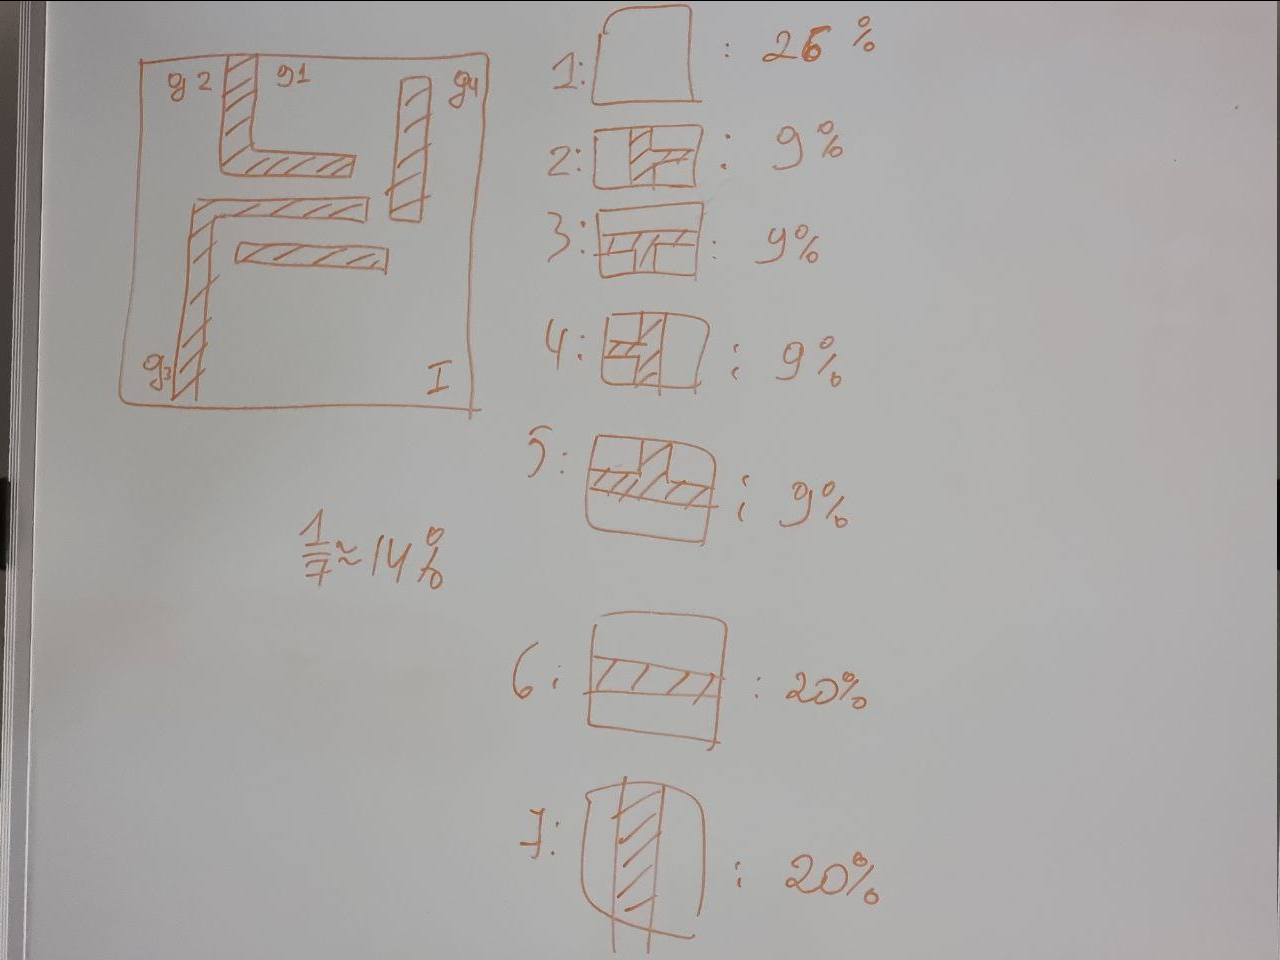

In [10]:
class TilesClass:
  """
  tiles - stores all possible states of cells representing patterns of walls
          for Grid World
  titleProbability - stores probability for each state to appear. It is a way to
                      adjust how many walls will be placed and which wall 
                      structure would be prefered  
  """
  def __init__(self):

    """
    List of all available tiles where Tile_0 ... Tile_6 are defined tiles
    and Tile_10 is a tile of undefined cells (which are not collapsed)
    """
    self.ListOfTiles = ["Tile_0", "Tile_1", "Tile_2", "Tile_3", "Tile_4", 
                        "Tile_5", "Tile_6", "Tile_10"]

    self.tiles = {
      "Tile_0":  np.array([[0,0,0],
                           [0,0,0],
                           [0,0,0]]),
                  
      "Tile_1":  np.array([[0,1,0],
                           [0,1,1],
                           [0,1,0]]),
                  
      "Tile_2":  np.array([[0,0,0],
                           [1,1,1],
                           [0,1,0]]),
                  
      "Tile_3":  np.array([[0,1,0],
                           [1,1,0],
                           [0,1,0]]),
      
      "Tile_4":  np.array([[0,1,0],
                           [1,1,1],
                           [0,0,0]]),

      "Tile_5":  np.array([[0,0,0],
                           [1,1,1],
                           [0,0,0]]),

      "Tile_6":  np.array([[0,1,0],
                           [0,1,0],
                           [0,1,0]]),
                  
      "Tile_10": np.array([[1,1,1],
                           [1,1,1],
                           [1,1,1]]),          
    }
    '''
    self.tiles[0] = np.array([[0,0,0],
                              [0,0,0],
                              [0,0,0]])
    
    self.tiles[1] = np.array([[0,1,0],
                              [0,1,1],
                              [0,1,0]])
    
    self.tiles[2] = np.array([[0,0,0],
                              [1,1,1],
                              [0,1,0]])
    
    self.tiles[3] = np.array([[0,1,0],
                              [1,1,0],
                              [0,1,0]])
    
    self.tiles[4] = np.array([[0,1,0],
                              [1,1,1],
                              [0,0,0]])
    
    self.tiles[5] = np.array([[0,0,0],
                              [1,1,1],
                              [0,0,0]])
    
    self.tiles[6] = np.array([[0,1,0],
                              [0,1,0],
                              [0,1,0]])
    
    self.tiles[7] = np.array([[1,1,1],
                              [1,1,1],
                              [1,1,1]])
    '''
    self.tileProbability = [0]*8
    self.tileProbability[0] = 26
    self.tileProbability[1] = 9
    self.tileProbability[2] = 9
    self.tileProbability[3] = 9
    self.tileProbability[4] = 9
    self.tileProbability[5] = 20
    self.tileProbability[6] = 20
    self.tileProbability[7] = 0

    """
    The dictionary that stores options for neighbours of each Tile.
    When a Tiles is assigned to a certain state, all neighbour options must
    be updated according to the rules stored here. Therefore, entropy is
    propagated among the cells.
    """
    self.Connection = {
        "wall": {
            "UP":     ["Tile_0", "Tile_4", "Tile_5"],
            "RIGHT" : ["Tile_0", "Tile_1", "Tile_6"],
            "DOWN":   ["Tile_0", "Tile_2", "Tile_5"],
            "LEFT":   ["Tile_0", "Tile_3", "Tile_6"] 
        },
        "path" : {
            "UP":     ["Tile_1","Tile_2","Tile_3","Tile_6"],
            "RIGHT" : ["Tile_2","Tile_3","Tile_4","Tile_5"],
            "DOWN":   ["Tile_1","Tile_3","Tile_4","Tile_6"],
            "LEFT":   ["Tile_1","Tile_2","Tile_4","Tile_5"]
        }   
    }

    self.connectionRules = {
      "Tile_0": {
          "UP":     self.Connection["wall"]["UP"],
          "RIGHT" : self.Connection["wall"]["RIGHT"],
          "DOWN":   self.Connection["wall"]["DOWN"],
          "LEFT":   self.Connection["wall"]["LEFT"]
      },
      "Tile_1": {
          "UP":     self.Connection["path"]["UP"],
          "RIGHT" : self.Connection["path"]["RIGHT"],
          "DOWN":   self.Connection["path"]["DOWN"],
          "LEFT":   self.Connection["wall"]["LEFT"]
      },
      "Tile_2": {
          "UP":     self.Connection["wall"]["UP"],
          "RIGHT" : self.Connection["path"]["RIGHT"],
          "DOWN":   self.Connection["path"]["DOWN"],
          "LEFT":   self.Connection["path"]["LEFT"]
      },
      "Tile_3": {
          "UP":     self.Connection["path"]["UP"],
          "RIGHT" : self.Connection["wall"]["RIGHT"],
          "DOWN":   self.Connection["path"]["DOWN"],
          "LEFT":   self.Connection["path"]["LEFT"]
      },
      "Tile_4": {
          "UP":     self.Connection["path"]["UP"],
          "RIGHT" : self.Connection["path"]["RIGHT"],
          "DOWN":   self.Connection["wall"]["DOWN"],
          "LEFT":   self.Connection["path"]["LEFT"]
      },
      "Tile_5": {
          "UP":     self.Connection["wall"]["UP"],
          "RIGHT" : self.Connection["path"]["RIGHT"],
          "DOWN":   self.Connection["wall"]["DOWN"],
          "LEFT":   self.Connection["path"]["LEFT"]
      },
      "Tile_6": {
          "UP":     self.Connection["path"]["UP"],
          "RIGHT" : self.Connection["wall"]["RIGHT"],
          "DOWN":   self.Connection["path"]["DOWN"],
          "LEFT":   self.Connection["wall"]["LEFT"]
      }
    }

  """
  Draws all Tiles and shows probability for each of them
  """  
  def DrawTiles(self):

    counter = 1;
    fig = plt.figure(figsize=(8, 8))
    fig.suptitle("Tiles", fontsize=16)

    for _, tile in self.tiles.items():
      ax = fig.add_subplot(3,4,counter)
      ax.set_title("Tile_" + str(counter-1))
      #ax.set_title("Prbability: " + str(self.tileProbability[counter-1]) + "%")
      plt.imshow(tile)
      counter = counter + 1
    plt.show()

  def getTile(self, index):
    if index in self.ListOfTiles:
      return self.tiles[index]
    else:
      print("Error! Wrong index was given. Expexted index: Tile_x where \
      x is 0, 1, ..., 6")


    

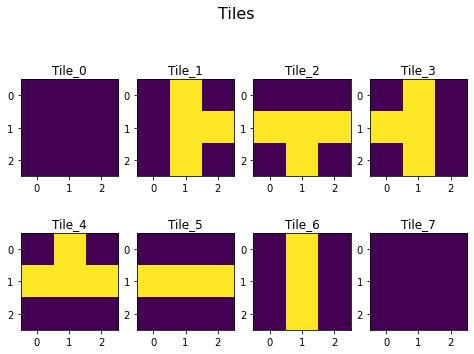

In [11]:
Tiles = TilesClass()
Tiles.DrawTiles()

In [12]:
class Cell():
  """
  options - shows which states (from 0 to 6) are available for this cell
  collapsed - shows if the cell was collapsed, which means the state was defined
  state - shows which state was assigned to the cell (from 0 to 6), where
          10 means the state was not assigned yet
  """

  def __init__(self):
    self.options = [
        "Tile_0",
        "Tile_1",
        "Tile_2",
        "Tile_3",
        "Tile_4",
        "Tile_5",
        "Tile_6"
    ]
    self.collapsed = False
    self.state = "Tile_10"
    self.entropy = len(self.options)

  def getState(self):
    return self.state

  def getEntropy(self):
    self.entropy = len(self.options)
    return self.entropy
  
  def isCollapsed(self):
    return self.collapsed

  def updateCell(self):
    # update options
    # update entropy
    print("Update")

  def setState(self, newState='Tile_0', method="direct"):

    if self.isCollapsed():
      print("The cell is already collapsed!")
      return

    if method == "random":
      newState = np.random.choice(self.options)
      # print("All options: ", self.options)
      # print("Random selection: ", newState)

    temporalTileObj = TilesClass()

    if newState in temporalTileObj.ListOfTiles:
      self.state = newState  
    elif type(newState) == int:
      if newState >= 0 and newState <= 6:
        self.state = temporalTileObj.ListOfTiles[newState]
      else:
        print("Error. The state index is out of range (0,6)")
    else:
      print("Error. Wrong state was given. Neither Tile name, nor Tile index")
        
    self.options = []
    self.entropy = 0
    self.collapsed = True


Create a Grid where all cells will be placed and drawed. Important to have an environment that can show all tiles together

In [29]:
class Grid():
  """
  
  """
  def __init__(self, size):
    self.size = size
    self.Tiles = TilesClass()
    self.Cells = np.ndarray(shape=(size, size), dtype=Cell)
    self.CollapsedCells = 0
    self.Map = np.zeros(shape=(3*size, 3*size))

    for i in range(size):
      for j in range(size):
        self.Cells[i][j] = Cell()

  def DrawBoard(self, includeEntropy=False, tiles="separate"):

    if tiles == "separate":
      counter = 1;
      fig = plt.figure(figsize=(8, 8))
      fig.suptitle("Tiles", fontsize=16)

      for rowCell in self.Cells:
        for cell in rowCell:
          cellState = cell.getState()

          ax = fig.add_subplot(self.size, self.size, counter)
          #ax.set_title(cellState)

          if includeEntropy:
            plt.text(0.7, 0.7, str(cell.getEntropy()), fontsize=12, color='w')

          plt.axis('off')
          plt.imshow(self.Tiles.getTile(cellState))      

          counter = counter + 1
      # fig.tight_layout()
      plt.show()
    elif tiles == "unite":
      plt.imshow(self.Map)
      plt.show()
    else:
      print("Error. Wrong tiles value was given!")

  """
  The function returns a cell with a lowest entropy
  """
  def LowestEntropy(self):
    lowestEntropy = 7
    lowestEntropyIndex = [0,0]
    # previousCellCollapse = self.Cells[0][0].isCollapsed()

    for i in range(self.size):
      for j in range(self.size):
        cell = self.Cells[i][j]
        if not cell.isCollapsed() and cell.getEntropy() < lowestEntropy:
          lowestEntropy = cell.getEntropy()
          lowestEntropyIndex = [i, j]

    # print("Cell with lowest entropy: ", lowestEntropyIndex)
    # print("Is the cell collapsed?", 
    #      self.Cells[lowestEntropyIndex[0]][lowestEntropyIndex[1]].isCollapsed())
    return lowestEntropyIndex

  def UpdateCellOptions(self, cellIndex, availableOptions):
    row = cellIndex[0]
    column = cellIndex[1]
    # print("Available options: ", availableOptions)
    # print("My options: ", self.Cells[row][column].options)

    if self.Cells[row][column].isCollapsed():
      # print("This cell is already collapsed")
      return
    else:
      copyOptions = self.Cells[row][column].options.copy()
      for option in copyOptions:
        if option in availableOptions:
          continue
        else:
          # print("I deleted an option: ", option)
          self.Cells[row][column].options.remove(option)
      
      # print("Cell [", row, "][", column, "]. My new options: ", self.Cells[row][column].options)

  """
  cellIndex = [i, j] - Index (row and collumn) of the cell which neighbours
                        shpuld be updated
  """
  def UpdateOptionsOfOthers(self, cellIndex):
    row = cellIndex[0]
    column = cellIndex[1]
    collapsedCell = self.Cells[row][column]
    cellState = collapsedCell.getState()

    # Update cell above
    if row > 0:
      availableOptions = self.Tiles.connectionRules[cellState]["UP"]
      self.UpdateCellOptions([row-1, column], availableOptions)
    
    # Update cell below
    if row < self.size-1:
      availableOptions = self.Tiles.connectionRules[cellState]["DOWN"]
      self.UpdateCellOptions([row+1, column], availableOptions)

    # Update cell to the right
    if column < self.size-1:
      availableOptions = self.Tiles.connectionRules[cellState]["RIGHT"]
      self.UpdateCellOptions([row, column+1], availableOptions)

    # Update cell to the right
    if column > 0:
      availableOptions = self.Tiles.connectionRules[cellState]["LEFT"]
      self.UpdateCellOptions([row, column-1], availableOptions)

  def CollapseCell(self, cellIndex):
    row = cellIndex[0]
    column = cellIndex[1]
    cell = self.Cells[row][column]
    
    listOfOptions = cell.options
    #newState = np.random.choice(listOfOptions)

    self.Cells[row][column].setState(method="random")

  """
  Collapse one cell with the lowest entropy and changes available options 
  of neighbours (makes update according to assigned state)
  """
  def Update(self):
    # Chose the cell with lowest entropy
    index = self.LowestEntropy()
    # Collapse the cell, select one state for it
    self.CollapseCell(index)
    # Propagate entropy to neighbours, change their available options
    self.UpdateOptionsOfOthers(index)
    self.CollapsedCells = self.CollapsedCells + 1

  def GenerateMap(self):
    maxNumberCollapsedCells = int(self.size * self.size)
    percentTHreshold = 10
    while self.CollapsedCells < maxNumberCollapsedCells:
      self.Update()
      percent = 100*self.CollapsedCells / maxNumberCollapsedCells
      if percent > percentTHreshold or percent == 100:
        # print(f"The map is generated by {percent:.1f}%")
        percentTHreshold = percentTHreshold + 10

    # Fill 2D array to save the whole map
    for i in range(self.size):
      for j in range(self.size):
        cell = self.Cells[i][j]
        state = cell.state
        cell2D = self.Tiles.tiles[state]
        
        for ii in range(3):
          for jj in range(3):
            row = i*3 + ii
            col = j*3 + jj
            self.Map[row][col] = cell2D[ii][jj]
      

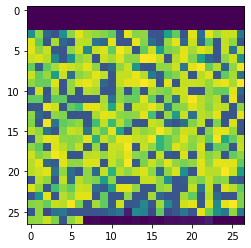

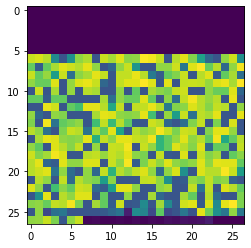

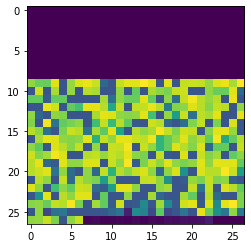

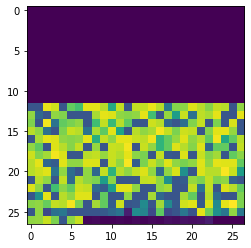

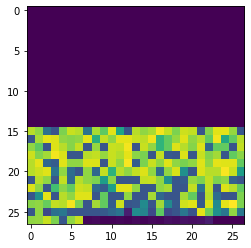

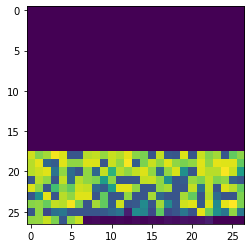

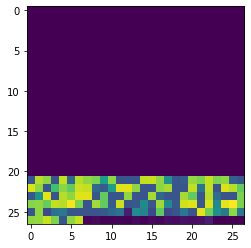

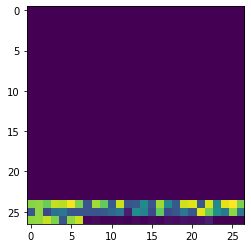

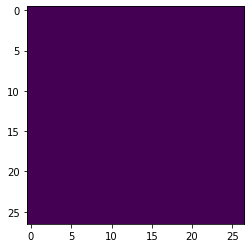

In [21]:
Game = Grid(9)
Game.printHuinya()

In [ ]:
Game = Grid(9)
Game.DrawBoard(includeEntropy = True)

Testing the appearence of cells

In [ ]:
Game = Grid(9)
Game.Cells[0][0].setState(3)
Game.Cells[3][2].setState(6)
Game.Cells[4][2].setState(6)
Game.Cells[5][2].setState(6)

Game.DrawBoard(includeEntropy = True)

**To ensure that player will have a path to all goals I could assume that yellow lines - are path and blue represents walls. In that case If I connect all yellow lines - I guarantee that player will have a path**

Checking if my functions for finding the cell with lowest entropy works well

In [ ]:
Game = Grid(9)
Game.DrawBoard(includeEntropy = True)

Game.Cells[5][2].setState(6)
Game.UpdateOptionsOfOthers([5,2])

Game.DrawBoard(includeEntropy = True)

In [ ]:
Game = Grid(9)
Game.DrawBoard(includeEntropy = True)
Game.Update()
Game.DrawBoard(includeEntropy = True)
Game.Update()
Game.DrawBoard(includeEntropy = True)
Game.Update()
Game.DrawBoard(includeEntropy = True)
Game.Update()
Game.DrawBoard(includeEntropy = True)
Game.Update()
Game.DrawBoard(includeEntropy = True)
Game.Update()
Game.DrawBoard(includeEntropy = True)
Game.Update()
Game.DrawBoard(includeEntropy = True)
Game.Update()
Game.DrawBoard(includeEntropy = True)
Game.Update()
Game.DrawBoard(includeEntropy = True)
Game.Update()
Game.DrawBoard(includeEntropy = True)
Game.Update()

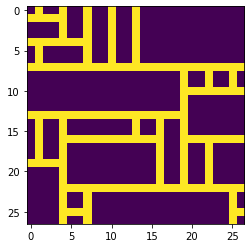

In [34]:
Game = Grid(9)
Game.GenerateMap()
Game.DrawBoard(tiles="unite")